# Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Для удобства добавим расшифровку названий столбцов.

* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма;
* box_office — сборы в рублях.

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pymystem3 import Mystem

#Для первого запуска pymystem3 при работе в Google colab
#!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
#!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
#!cp mystem /root/.local/bin/mystem
#Если не в Google colab, то все закомментировать


In [3]:
mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [4]:
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [6]:
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [7]:
sorted(mkrf_movies['puNumber'].unique())

[' 111004112',
 '111000110',
 '111000111',
 '111000112',
 '111000113',
 '111000114',
 '111000115',
 '111000116',
 '111000117',
 '111000118',
 '111000119',
 '111000210',
 '111000211',
 '111000212',
 '111000213',
 '111000214',
 '111000215',
 '111000216',
 '111000217',
 '111000218',
 '111000219',
 '111000310',
 '111000311',
 '111000312',
 '111000313',
 '111000314',
 '111000315',
 '111000317',
 '111000318',
 '111000319',
 '111000410',
 '111000411',
 '111000412',
 '111000413',
 '111000414',
 '111000415',
 '111000416',
 '111000417',
 '111000418',
 '111000419',
 '111000510',
 '111000511',
 '111000512',
 '111000513',
 '111000514',
 '111000515',
 '111000516',
 '111000517',
 '111000518',
 '111000519',
 '111000610',
 '111000611',
 '111000612',
 '111000613',
 '111000614',
 '111000615',
 '111000616',
 '111000617',
 '111000618',
 '111000619',
 '111000710',
 '111000711',
 '111000712',
 '111000714',
 '111000715',
 '111000716',
 '111000717',
 '111000718',
 '111000719',
 '111000810',
 '111000811',
 '111

In [8]:
mkrf_movies[mkrf_movies['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1293,Stars in Shorts,121011114,2014-06-03T12:00:00.000Z,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия"
6105,Значит любит,111013818,2018-08-10T12:00:00.000Z,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01T12:00:00.000Z,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15T12:00:00.000Z,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
6485,До и После,112014418,2018-12-05T12:00:00.000Z,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив"
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05T12:00:00.000Z,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06T12:00:00.000Z,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mkrf_movies[mkrf_movies['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия"


In [10]:
mkrf_movies[mkrf_movies['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04T12:00:00.000Z,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
1735,Помпеи. Британский музей,126003413,2013-09-11T12:00:00.000Z,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22T12:00:00.000Z,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11T12:00:00.000Z,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия"
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25T12:00:00.000Z,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11T12:00:00.000Z,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка"


In [11]:
mkrf_movies[mkrf_movies['producer'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"
11,Ответный ход,111019014,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01T12:00:00.000Z,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"приключения,военный"
7406,Назначаешься внучкой,111020519,2019-12-01T12:00:00.000Z,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,военный
7407,Перед рассветом,111020619,2019-12-01T12:00:00.000Z,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама"
7408,Ты помнишь,111020719,2019-12-01T12:00:00.000Z,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный"


In [12]:
len(mkrf_movies[mkrf_movies['producer'].isna() == True])

568

In [13]:
mkrf_movies[mkrf_movies['producer'].isna() == True]['production_country'].value_counts()

СССР                                       342
Россия                                      37
Великобритания                              33
США                                         24
СССР                                        20
                                          ... 
Бельгия - Испания - Канада - Нидерланды      1
Чехословакия                                 1
Индонезия                                    1
СССР, Албания                                1
СССР                                         1
Name: production_country, Length: 70, dtype: int64

In [14]:
mkrf_movies[mkrf_movies['producer'].isna() == True]['type'].value_counts()

Художественный       421
Прочие                57
 Художественный       54
Анимационный          19
Документальный        15
Научно-популярный      2
Name: type, dtype: int64

In [15]:
mkrf_movies['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [16]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [17]:
mkrf_movies.describe()

,refundable_support,nonrefundable_support,budget
count,332.000,332.000,332.000
mean,11864457.831,48980988.892,127229716.684
std,24916555.264,59980117.923,188588333.115
min,0.000,0.000,0.000
25%,0.000,25000000.000,42000000.000
50%,0.000,30000000.000,68649916.000
75%,15000000.000,40375000.000,141985319.500
max,180000000.000,400000000.000,2305074303.000


In [18]:
mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [19]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,2450.000
1,111000115,61040.000
2,111000116,153030013.400
3,111000117,12260956.000
4,111000118,163684057.790


In [20]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [21]:
mkrf_shows.describe()

,puNumber,box_office
count,3158.000,3158.000
mean,120187475.322,76478696.161
std,12383941.151,240353122.823
min,111000113.000,0.000
25%,113000191.750,86239.000
50%,121013114.500,2327987.550
75%,121028317.750,23979671.025
max,224026410.000,3073568690.790


In [22]:
mkrf_shows.describe()

,puNumber,box_office
count,3158.000,3158.000
mean,120187475.322,76478696.161
std,12383941.151,240353122.823
min,111000113.000,0.000
25%,113000191.750,86239.000
50%,121013114.500,2327987.550
75%,121028317.750,23979671.025
max,224026410.000,3073568690.790


#### Вывод

Для mkrf_movies:

Нужно перевести в другой тип:
* puNumber как object, необходимо перевести в числовой;
* show_start_date перевести в тип datetime;

Нужно исправить:
* В типе фильма есть одинаковые значения, но в некоторых допущен лишний пробел впереди названия;
* В значениях столбца puNumber есть лишние пробелы;

Есть пропуски:
* В `film_studio`. Всего 18 пропусков;
* Пропуски в `production_country`. Всего 2 пропуска, эти картины из России;
* Пропуски в `director`. Всего 9 пропусков;
* В `producer` - 568 пропусков;
* Пропущена значительная часть данный в `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. Но в описании указано, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Также бюджет этих фильмов указан с учетом государственной поддержки;
* Пропуски в `genres` и `ratings`

В датасете mkrf_movies в основном столбцы с категориальными переменными, из количественных только `refundable_support`, `nonrefundable_support`, `budget`.

mkrf_shows не содержит пропусков, номера лицензий не повторяются, медиана сборов составляет 2327987 рублей, а среднее 76478696 рублей. Такая разница говорит о том, что значения сильно разнятся. Интересно, что есть и сборы, равные нулю. Получается какие-то картины так и не вышли в прокат, либо на них никто не ходил. Еще нулевые сборы могут означать, что эти картины были выполнены по заказу, поэтому в прокат не выходили. Вариантов много.

Чтобы объединить эти датасеты нам необходимо исправить значения в столбце puNumber

In [23]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].replace(' ', '')

In [24]:
mkrf_movies['puNumber'].count()

7486

In [25]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'] = 0

В строке, где было значение 'нет' проставили 0.
Теперь преобразуем в числовой тип данные из этого столбца

In [26]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'])

In [27]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 877.4+ KB


Все успешно. Теперь можно соединять. Сначала проверим, нет ли лицензий, равных нулю.

In [28]:
mkrf_shows[mkrf_shows['puNumber'] == 0].count()

puNumber      0
box_office    0
dtype: int64

In [29]:
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


Видим, что все 3158 значений присоединены без потерь. Можно продолжать работу дальше

ВАЖНО! Номер лицензии "0" - отсутствующее значение

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Переведем `show_start_date` в тип datetime

In [31]:
df.loc[1504]

title                                                     Роботы 3D
puNumber                                                  124004413
show_start_date                            2013-12-30T12:00:00.000Z
type                                                   Анимационный
film_studio              Анимация Студио, Янг Джамп Энимейшн Студио
production_country                                   Малайзия - США
director                                       Лунг Ах, Чонг Ти Чуа
producer                          Теик Чен Леоу, Рэй Ли, Эдмунд Чан
age_restriction              «0+» - для любой зрительской аудитории
refundable_support                                              NaN
nonrefundable_support                                           NaN
budget                                                          NaN
financing_source                                                NaN
ratings                                                         6.8
genres                                фантастика

In [32]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(10)
memory usage: 1.3+ MB


In [34]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [35]:
unknown_ratings = ['99%', '28%', '97%','83%', '64%',
                  '91%', '94%', '62%', '79%', '90%',
                  '19%', '88%', '89%', '98%']

In [36]:
df.query('ratings in @unknown_ratings').sort_values(by='ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,19%,комедия,37960.000
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,28%,"детский,приключения,комедия",1740.000
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,62%,"фэнтези,семейный",nan
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,64%,"мюзикл,фэнтези,мелодрама",528732557.700
7159,Анна Каренина. Интимный дневник,111013919,2019-10-23 12:00:00+00:00,Художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,79%,драма,182882.500
2680,Год Белого Слона,111003915,2015-04-08 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,79%,семейный,nan
3446,Короткие истории о любви - 4,126006316,2016-12-30 12:00:00+00:00,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,nan,nan,nan,NaN,83%,NaN,2266408.000
5455,Вечный холод,111006417,2017-08-28 12:00:00+00:00,Художественный,"ЗАО ""Производственный комплекс ""ГЛАВКИНО"", ООО...",Россия,А.Мигачев,И.Бачурин,«18+» - запрещено для детей,nan,nan,nan,NaN,83%,"фэнтези,боевик,триллер",nan
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,nan,nan,nan,NaN,83%,NaN,1429859.000
5332,Добыча.,121009411,2011-06-15 12:00:00+00:00,Художественный,Афтер Дарк Филмз,США,Патрик Сиверсен,"Закари Ти Брайан, Кристофер",«18+» - запрещено для детей,nan,nan,nan,NaN,88%,"фантастика,боевик,триллер",nan


Что имелось ввиду под процентами в рейтинге кинокартин? Неизвестно. Это может быть доля количества отзывов, необходимых для оценки.

In [37]:
df['corrected_ratings'] = df['ratings']
df.loc[df['corrected_ratings'].isin(unknown_ratings), 'corrected_ratings'] = np.nan

In [38]:
df['corrected_ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [39]:
df['corrected_ratings'] = pd.to_numeric(df['corrected_ratings'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
corrected_ratings        6490 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(10)
memory usage: 1.3+ MB


In [41]:
df['ratings'] = df['corrected_ratings']

In [42]:
del df['corrected_ratings']

##### **Вывод**

* Перевели значения столбца show_start_date в тип datetime;
* Перезаписали значения столбца `ratings` в `corrected_ratings`, перевели значения в тип float64, значения в процентах привели к NaN.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [43]:
df.isna().mean()

title                   0.000
puNumber                0.000
show_start_date         0.000
type                    0.000
film_studio             0.002
production_country      0.000
director                0.001
producer                0.076
age_restriction         0.000
refundable_support      0.956
nonrefundable_support   0.956
budget                  0.956
financing_source        0.956
ratings                 0.133
genres                  0.130
box_office              0.578
dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(9)
memory usage: 1.3+ MB


* В `film_studio`. Всего 18 пропусков;
* Пропуски в `production_country`. Всего 2 пропуска, эти картины из России;
* Пропуски в `director`. Всего 9 пропусков;
* В `producer` - 568 пропусков;
* Пропущена значительная часть данный в `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. Но в описании указано, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Также бюджет этих фильмов указан с учетом государственной поддержки;
* Пропуски в `genres` и `ratings`

**Пропуски в столбце `film_studio`**

In [45]:
df[df['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.300,комедия,nan
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.000,"мультфильм,комедия",nan
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,nan,nan,nan,NaN,nan,NaN,nan
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,nan,NaN,nan
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,41225.000
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.900,"драма,криминал,детектив",nan
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan


Видим, что в этом столбце преобладает авторское кино. Скорее всего здесь нет никакой ошибки. Кино спонсировала не студия-производитель, а сами авторы (продюсер, режиссер). Выбивается только "Мульт личности. Выпуск 5". Эта картина по информации из интернета делалась по заказу первого канала. В ней так и напишем: "Первый канал"

In [46]:
df.loc[4441, 'film_studio'] = 'Первый канал'

In [47]:
df.loc[4441]

title                                  Мульт личности. Выпуск 5
puNumber                                              214000410
show_start_date                       2010-01-25 12:00:00+00:00
type                                             Художественный
film_studio                                        Первый канал
production_country                                          NaN
director                                                    NaN
producer                                                    NaN
age_restriction          «0+» - для любой зрительской аудитории
refundable_support                                          NaN
nonrefundable_support                                       NaN
budget                                                      NaN
financing_source                                            NaN
ratings                                                   4.000
genres                                       мультфильм,комедия
box_office                              

Остальные пропуски оставим без изменений.

**Пропуски в `production_country`. Всего 2 пропуска, эти картины из России**

In [48]:
df.loc[df['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.200,"детский,комедия",194527.000
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Первый канал,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.000,"мультфильм,комедия",nan


In [49]:
df.loc[df['production_country'].isna() == True, 'production_country'] = 'Россия'

In [50]:
len(df.loc[df['production_country'].isna() == True])

0

**Пропуски в `director`. Всего 9 пропусков**

In [51]:
df.loc[df['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,44350.000
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.900,"концерт,музыка",nan
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Первый канал,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.000,"мультфильм,комедия",nan
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,6.700,"концерт,музыка",nan


Эти пропуски оставим без изменений, их всего 9, на дальнейшие расчеты никак не повлияют.

То же самое сделаем и с пропущенными значениями в столбце `producer`

Есть также пропуски в столбце `genres` и `ratings`. Но здесь тоже ничего не можем поделать. Оставим все как есть.

##### **Вывод**

Считаем пропуски в film_studio как авторское кино, остальные пропуски никак не стали обрабатывать, так как нет данных для заполнения

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим наличие дубликатов

In [52]:
df.duplicated().sum()

0

In [53]:
df[df['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,8.100,"драма,спорт",nan
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,nan,nan,nan,NaN,7.700,"боевик,драма,криминал",nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.500,"триллер,детектив,криминал",nan
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.900,"комедия,приключения,детектив",nan
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,nan,nan,nan,NaN,6.500,"триллер,драма",175003.510
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"триллер,криминал,детектив",nan


In [54]:
df[(df['title'].duplicated(keep=False)) & (df['box_office'].isna() == False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.700,"фэнтези,приключения,семейный",759526.000
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.000,"фэнтези,приключения,семейный",1093810.000
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.200,"фэнтези,приключения,семейный",1125302.000
114,Гарри Поттер и философский камень /По роману Д...,121025916,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз/1492 Пикчерз/Данк...",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.200,"фэнтези,приключения,семейный",1948760.000
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.900,"фэнтези,приключения,семейный",843310.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,Дитя тьмы,121010819,2019-05-23 12:00:00+00:00,Художественный,Брокен Миррор Фильм,Канада,Джереми Люттер,"Джереми Люттер, Жослин Расселл, Робин Чан",«18+» - запрещено для детей,nan,nan,nan,NaN,6.900,"ужасы,триллер,детектив",2276644.940
7281,Прощание,121028719,2019-10-07 12:00:00+00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.200,драма,2617932.500
7289,Игра с огнем,121029319,2019-10-10 12:00:00+00:00,Художественный,"Йал Продакшнз, Хопскоч Пикчерз, Фильм Моуд Инт...",США,Майк Ган,"Джордан Бекман, Суки Чю",«18+» - запрещено для детей,nan,nan,nan,NaN,5.600,триллер,281077.000
7322,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.000,20000000.000,75000000.000,Фонд кино,7.800,драма,3181218.000


In [55]:
df.loc[110, 'title']

'Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/'

In [56]:
df[df['title'] == 'Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
109,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221004916,2016-02-09 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.700,"фэнтези,приключения,семейный",nan
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.700,"фэнтези,приключения,семейный",759526.000
4427,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221134510,2010-11-29 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.700,"фэнтези,приключения,семейный",nan


Получается, что есть одни и те же картины, которые выходили в прокат неоднократно, поэтому у них разные номера прокатных удостоверений.

In [57]:
df['puNumber'].duplicated().sum()

2

In [58]:
df[df['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.000,"мелодрама,комедия",nan
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.600,"драма,мелодрама,история",nan
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.400,"комедия,криминал",nan
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.800,"комедия,криминал",nan


In [59]:
df[df['title'] == df.loc[4638, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.000,"мелодрама,комедия",nan
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.000,"мелодрама,комедия",nan


In [60]:
df[df['title'] == df.loc[4639, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4050,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.600,"драма,мелодрама,история",nan
4513,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.600,"драма,мелодрама,история",nan
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.600,"драма,мелодрама,история",nan


In [61]:
df[df['title'] == df.loc[5067, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.400,"комедия,криминал",nan
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.400,"комедия,криминал",nan


In [62]:
df[df['title'] == df.loc[5068, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.800,"комедия,криминал",nan


##### **Вывод**

Полностью повторяющих строк нет. Есть дубли в названиях фильмов, это связано с неоднократной выдачей прокатных удостоверений. Исправить это не можем, так как в этом случае утеряется номер прокатного удостоверения. Есть дубли в номерах прокатных удостоверений, это скорее всего связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Может, эти фильмы "крутились" подряд. По крайней мере в реестре на официальном сайте так все и есть: под одним номером - два фильма.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Во всех категориальных переменных значения разделены запятыми без пробелов (столбец с жанрами), для стран в качестве разделителя "-". Будем иметь это ввиду.

In [63]:
df['type'] = df['type'].str.strip()

In [64]:
df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [65]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [66]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

##### **Вывод**

В столбце `type` были лишние пробелы, исправили это. Почти во всех категориальных переменных есть повторяющиеся значения в совокупности с другими. Например: "драма,триллер", "драма,военный". Это не можем исправить.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [67]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan


In [68]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [69]:
groups = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings']

In [70]:
df[groups].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.000,332.000,332.000,3158.000,6490.000
mean,11864457.831,48980988.892,127229716.684,76478696.161,6.479
std,24916555.264,59980117.923,188588333.115,240353122.823,1.102
min,0.000,0.000,0.000,0.000,1.000
25%,0.000,25000000.000,42000000.000,86239.000,5.900
50%,0.000,30000000.000,68649916.000,2327987.550,6.600
75%,15000000.000,40375000.000,141985319.500,23979671.025,7.200
max,180000000.000,400000000.000,2305074303.000,3073568690.790,9.200


Видим, что есть фильмы с нулевым бюджетом, посмотрим такие значения

In [71]:
df[df['budget'] == 0].describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.000,17.000,17.000,17.000,16.000,17.000
mean,112067204.471,16705882.353,65174674.412,0.000,5.725,163137294.425
std,1473501.270,20064784.779,61236204.091,0.000,0.916,251115991.429
min,111000415.000,0.000,0.000,0.000,4.300,1334699.400
25%,111009615.000,0.000,23000000.000,0.000,5.075,50451949.000
50%,111017315.000,10000000.000,51000000.000,0.000,5.700,72937783.200
75%,114001715.000,20000000.000,75000000.000,0.000,6.300,184487551.400
max,114006518.000,60000000.000,250000000.000,0.000,7.800,1038321489.000


несмотря на то, что у этих фильмов нулевой бюджет, есть такие фильмы, где сумма поддержки ненулевая. В этом случае бюджет не может быть меньше суммы поддержки. Проверим кинокартины, у которых бюджет меньше суммы возвратных и невозвратных средств.

In [72]:
df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000,23000000.000,0.000,"Министерство культуры, Фонд кино",6.600,мелодрама,10234016.100
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,75000000.000,0.000,Фонд кино,6.600,драма,446163511.000
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.000,70000000.000,0.000,Фонд кино,7.800,"боевик,драма,криминал",196572438.400
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.000,0.000,0.000,Фонд кино,6.200,"комедия,фэнтези",67418974.800
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.000,100000000.000,0.000,Фонд кино,4.600,"мультфильм,приключения,фэнтези",184487551.400
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000,59000000.000,0.000,Фонд кино,6.300,"комедия,драма",1957738.510
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,35000000.000,0.000,Фонд кино,5.100,"комедия,мелодрама",72937783.200
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000,6000000.000,0.000,Министерство культуры,4.300,комедия,15362931.430
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.000,51000000.000,0.000,Фонд кино,6.300,"комедия,мелодрама",70299052.000
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000,250000000.000,0.000,Фонд кино,5.600,фантастика,1038321489.000


Такие картины есть. Исправим в них бюджет на сумму поддержки. Для этого напишем функцию.

In [73]:
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [74]:
df['budget_corrected'] = df.apply(correct_budget, axis=1)

In [75]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_corrected
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan,nan
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan,nan
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,nan
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,nan
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,nan


In [76]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,budget_corrected
count,7486.000,332.000,332.000,332.000,6490.000,3158.000,332.000
mean,135178527.637,11864457.831,48980988.892,127229716.684,6.479,76478696.161,131422395.795
std,38382177.411,24916555.264,59980117.923,188588333.115,1.102,240353122.823,187148242.667
min,0.000,0.000,0.000,0.000,1.000,0.000,6000000.000
25%,112025043.000,0.000,25000000.000,42000000.000,5.900,86239.000,45524799.500
50%,121015464.500,0.000,30000000.000,68649916.000,6.600,2327987.550,71196901.500
75%,124003313.750,15000000.000,40375000.000,141985319.500,7.200,23979671.025,150000000.000
max,231001111.000,180000000.000,400000000.000,2305074303.000,9.200,3073568690.790,2305074303.000


суммы кол-ва строк совпали

теперь посмотрим, есть ли еще такие строки

In [77]:
len(df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget_corrected']])

0

In [78]:
df['budget'] = df['budget_corrected']

In [79]:
del df['budget_corrected']

In [80]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

##### **Вывод**

Заменили нулевые значения бюджета, где сумма поддержки превышала значение бюджета. 

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [81]:
df['show_start_year'] = df['show_start_date'].dt.year

In [82]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,2015


In [83]:
df['show_start_year'].value_counts()

2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_year, dtype: int64

Создали столбец с годом начала показа фильма.

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [84]:
df['director_first'] = df['director'].str.split(",").str[0]
df['genre_first'] = df['genres'].str.split(",").str[0]
df['director_first'] = df['director_first'].str.strip()
df['genre_first'] = df['genre_first'].str.strip()

In [85]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.200,"боевик,драма,мелодрама",nan,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600,"драма,военный",nan,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.800,"фантастика,боевик,триллер",nan,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Я так понял, что здесь подразумевается сумма возвратных и невозвратных средств государственной поддержки. 

In [86]:
df['ratio_help_to_budget'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [87]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget
count,7486.000,332.000,332.000,332.000,6490.000,3158.000,7486.000,332.000
mean,135178527.637,11864457.831,48980988.892,131422395.795,6.479,76478696.161,2014.594,0.542
std,38382177.411,24916555.264,59980117.923,187148242.667,1.102,240353122.823,3.008,0.197
min,0.000,0.000,0.000,6000000.000,1.000,0.000,2010.000,0.044
25%,112025043.000,0.000,25000000.000,45524799.500,5.900,86239.000,2012.000,0.385
50%,121015464.500,0.000,30000000.000,71196901.500,6.600,2327987.550,2015.000,0.614
75%,124003313.750,15000000.000,40375000.000,150000000.000,7.200,23979671.025,2017.000,0.661
max,231001111.000,180000000.000,400000000.000,2305074303.000,9.200,3073568690.790,2019.000,1.000


##### **Вывод**

* Выделили год из даты премьеры и добавили в новый столбец;
* Выделили первого в списке режиссера и жанр, также значения добавили в новые столбцы;
* Посчитали долю государственной поддержки по отношению к бюджету.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Самое интересное, что в столбце `box_office` есть нулевые значения, а также значения до 100 тыс. Но заменить их другими не можем. Будем проводить анализ, как есть.

Если я правильно понял, то нас просят показать кол-во фильмов по годам, но только для тех кинокартин, которые были показаны в кинотеатре. Из описания мы знаем, что те картины, где указаны сборы в рублях, были показаны в кинотеатре.

In [88]:
df.groupby('show_start_year')['box_office'].count().sum()

3158

In [89]:
t_one = df.groupby('show_start_year')['box_office'].count().reset_index()

In [90]:
t_one

,show_start_year,box_office
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,279
5,2015,465
6,2016,526
7,2017,357
8,2018,475
9,2019,530


In [91]:
t_two = (df[['show_start_year','box_office']].groupby(
    'show_start_year'
    ).apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100).to_frame(
    ).reset_index()

In [92]:
t_two

,show_start_year,0
0,2010,10.660
1,2011,17.524
2,2012,21.585
3,2013,29.206
4,2014,34.572
5,2015,65.957
6,2016,64.303
7,2017,70.693
8,2018,53.311
9,2019,56.989


In [93]:
t = t_one.merge(t_two, how='left', on='show_start_year')

In [94]:
t.rename(columns={'box_office' : 'films_in_cinema_count', 0 : 'cinema_part'}, inplace=True)

In [95]:
t

,show_start_year,films_in_cinema_count,cinema_part
0,2010,105,10.660
1,2011,109,17.524
2,2012,128,21.585
3,2013,184,29.206
4,2014,279,34.572
5,2015,465,65.957
6,2016,526,64.303
7,2017,357,70.693
8,2018,475,53.311
9,2019,530,56.989


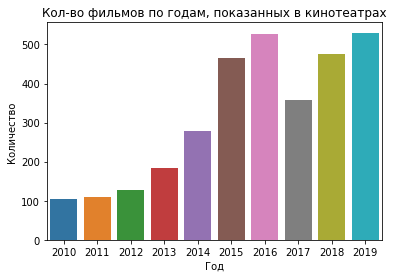

In [96]:
sns.barplot(x='show_start_year', y='films_in_cinema_count', data=t);
plt.title('Кол-во фильмов по годам, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Количество');

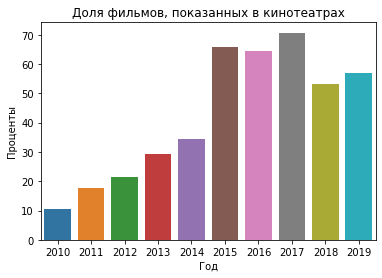

In [97]:
sns.barplot(x='show_start_year', y='cinema_part', data=t);
plt.title('Доля фильмов, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Проценты');

In [98]:
t.corr()

,show_start_year,films_in_cinema_count,cinema_part
show_start_year,1.000,0.909,0.865
films_in_cinema_count,0.909,1.000,0.902
cinema_part,0.865,0.902,1.000


##### **Вывод**

Данные неоднородны. В данной выборке меньше всего фильмов, показанных в кинотеатре, с 2010 по 2014. Доля варьируется от 10 до 34 процентов. В связи с этим нельзя говорить о том, что в эти годы было меньше всего кинопоказов. Самый большое количество кинопоказов в кинотеатрах в 2019, хотя доля этих фильмов за этот год в нашей выборке не самая большая в сравнение с другими годами.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [99]:
t = df.groupby('show_start_year')['box_office'].agg('sum')

In [100]:
t

show_start_year
2010       2428654.000
2011      14102765.000
2012       6955423.000
2013      29799706.200
2014    7444951859.200
2015   39497365196.400
2016   47866299741.910
2017   48563707217.510
2018   49668403134.320
2019   48425708779.590
Name: box_office, dtype: float64

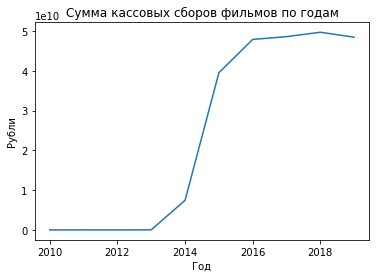

In [101]:
sns.lineplot(data=t)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');
plt.show()

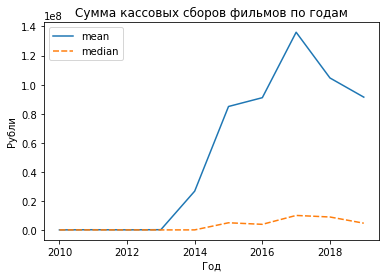

In [102]:
sns.lineplot(data=df.groupby('show_start_year')['box_office'].agg(['mean', 'median']))
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Рубли');
plt.show()

##### **Вывод**

Опять же, смотря, как считать. Если нужно учитывать в принципе сумму сборов по годам, то максимум приходится на 2018 год. Года с 2010 по 2014 в расчет не берем, так как по ним меньше всего данных, поэтому минимум приходится на 2015 год

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [103]:
t = df.groupby('show_start_year')['box_office'].agg(['mean', 'median'])

In [104]:
t

,mean,median
show_start_year,,
2010,23130.038,1700.000
2011,129383.165,3000.000
2012,54339.242,5660.000
2013,161954.925,3522.500
2014,26684415.266,18160.000
2015,84940570.315,4920933.000
2016,91000569.852,3846679.410
2017,136032793.326,9968340.000
2018,104565059.230,8891102.210


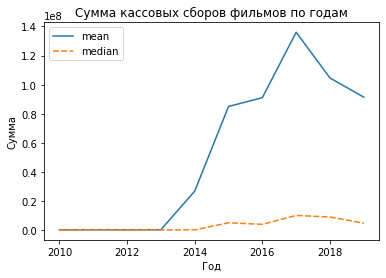

In [105]:
sns.lineplot(data=t)
plt.title('Сумма кассовых сборов фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Сумма');
plt.show()

##### **Вывод**

Видим, что для сборов очень большой разброс данных, это видно из разницы между средней и медианой. Это означает, что в данных присутствуют значения с невероятно большими сборами по сравнению с остальными. Для кино это нормально.
В среднем, самый прибыльный "кассовый" год был 2017. Это видно и по медиане, и по средней.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [106]:
df.query('2015 <= show_start_year').groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории     809077425.970
«18+» - запрещено для детей              40759615572.120
«6+» - для детей старше 6 лет            55798610799.680
«12+» - для детей старше 12 лет          60619446628.330
«16+» - для детей старше 16 лет          76034733643.630
Name: box_office, dtype: float64

В период с 2015 по 2019 год больше всего кассовых сборов у фильмов 16+

In [107]:
t = df.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()

In [108]:
t

,show_start_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,379054578.370
1,2015,«12+» - для детей старше 12 лет,13616082008.910
2,2015,«16+» - для детей старше 16 лет,11368120870.270
3,2015,«18+» - запрещено для детей,5432308367.440
4,2015,«6+» - для детей старше 6 лет,8701799371.410
5,2016,«0+» - для любой зрительской аудитории,150228848.670
6,2016,«12+» - для детей старше 12 лет,12204446524.390
7,2016,«16+» - для детей старше 16 лет,16664548541.740
8,2016,«18+» - запрещено для детей,6793929818.870
9,2016,«6+» - для детей старше 6 лет,12053146008.240


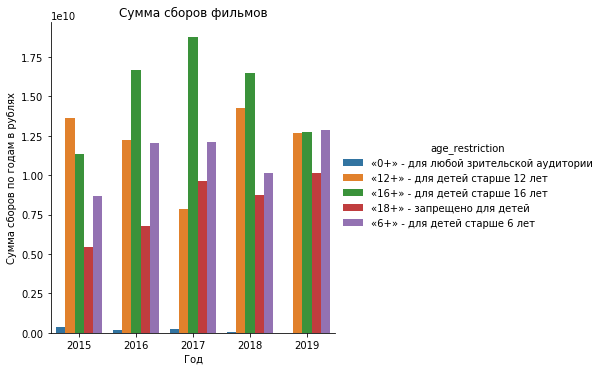

In [109]:
fg = sns.catplot(x='show_start_year', y='box_office', hue='age_restriction', data=t, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

По графику почти во все годы лидирует по сборам кино 16+, в 2015 в лидерах кино 12+, а в 2019 - 6+

##### **Вывод**

Больше всего денег собрало кино 16+, но лидирует такие киноленты не во все года.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Выделим такие фильмы

In [110]:
t= df[df['budget'].isna() == False].copy()

In [111]:
t

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first,ratio_help_to_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.100,"драма,мелодрама",365353.600,2013,А.Атанесян,драма,0.334
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,nan,NaN,28140.000,2014,А.Якимчук,NaN,0.700
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.300,"комедия,фантастика",19957031.500,2013,Р.Давлетьяров,комедия,0.613
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.200,драма,55917.500,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.400,драма,232100.000,2014,М.Угаров,драма,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.000,400000000.000,980000000.000,Фонд кино,6.000,"история,биография,драма",717703185.530,2019,А.Кравчук,история,0.510
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.000,0.000,190000000.000,Фонд кино,6.700,"мультфильм,приключения,семейный",501069235.000,2019,Д.Шмидт,мультфильм,0.526
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.000,400000000.000,944000000.000,Фонд кино,5.700,"фантастика,боевик",nan,2019,Ф.Бондарчук,фантастика,0.530
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.000,30000000.000,46154000.000,Министерство культуры,5.900,драма,nan,2019,И.Северов,драма,0.650


Создадим столбец с суммой гос. поддержки

In [112]:
t['total_support'] = t['refundable_support'] + t['nonrefundable_support']

а также добавим столбец `payback` с разностью между сборами и бюджетом.

In [113]:
t['payback'] = t['box_office'] - t['budget']

In [114]:
t.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget,total_support,payback
count,332.000,332.000,332.000,332.000,314.000,318.000,332.000,332.000,332.000,318.000
mean,111593819.096,11864457.831,48980988.892,131422395.795,6.001,132432420.046,2016.720,0.542,60845446.723,425697.962
std,5703031.322,24916555.264,59980117.923,187148242.667,1.124,334837856.986,1.641,0.197,72755459.467,315910432.271
min,111000115.000,0.000,0.000,6000000.000,1.000,1550.000,2013.000,0.044,3000000.000,-1971477243.410
25%,111004891.500,0.000,25000000.000,45524799.500,5.300,1236675.500,2015.000,0.385,25333750.000,-70694429.750
50%,111010367.000,0.000,30000000.000,71196901.500,6.200,15720067.715,2017.000,0.614,35000000.000,-40680816.250
75%,111017815.750,15000000.000,40375000.000,150000000.000,6.700,106373008.273,2018.000,0.661,60000000.000,-2362182.185
max,214010116.000,180000000.000,400000000.000,2305074303.000,8.500,3073568690.790,2019.000,1.000,500000000.000,2913568690.790


Видим, что соотношение гос. поддержки к бюджету в среднем 55%. То есть, в среднем половина бюджета - гос. поддержка. Также интересно, что "в среднем" фильмы имеют чистую прибыль в 425 тыс. рублей, но по таблице больше 75% фильмов убыточно. Об этом говорит отрицательное значение квантиле 75. Такой огромный разброс говорит о том, что в данных есть хиты, которые бьют рекорды по сборам.

In [115]:
t.groupby('show_start_year')['total_support'].count()

show_start_year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: total_support, dtype: int64

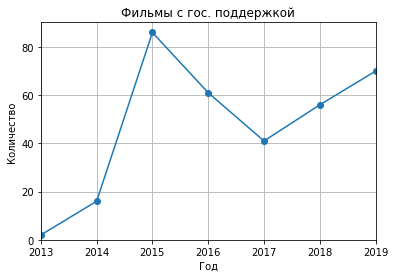

In [116]:
t.groupby('show_start_year')['total_support'].count().plot(ylim=0, grid=True, style='o-');
plt.title('Фильмы с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Количество');

За 2013 и 2014 данных мало. Эти года не будем учитывать при анализе.

In [117]:
t = t[t['show_start_year'] > 2014]

Сколько вообще выделялось денег за каждый год.

In [118]:
t.groupby('show_start_year')['total_support'].sum()

show_start_year
2015   3656241459.000
2016   4303155482.000
2017   3183971662.000
2018   3446969465.000
2019   4904000000.000
Name: total_support, dtype: float64

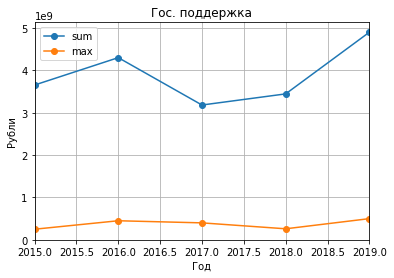

In [119]:
t.groupby('show_start_year')['total_support'].agg(
    ['sum', 'max']).plot(grid=True, ylim=0, style='o-');
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

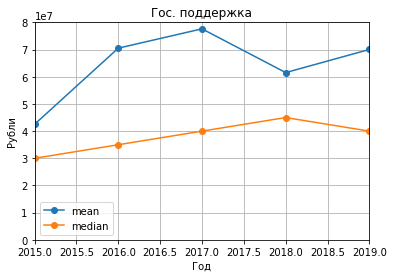

In [120]:
t.groupby('show_start_year')['total_support'].agg(
    ['mean', 'median']).plot(grid=True, ylim=0, style='o-');
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

Соотнесем с рейтингом

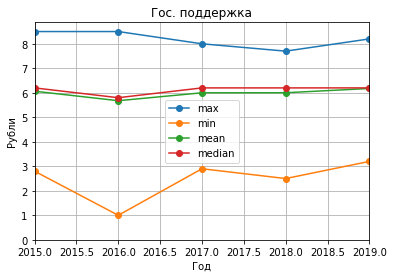

In [121]:
t.groupby('show_start_year')['ratings'].agg(
    ['max', 'min', 'mean', 'median']).plot(grid=True, ylim=0, style='o-')
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

Если смотреть по медиане рейтинга, то 2016 год был самым худшим. Медиана оценки в этом году (2016) около 1 балла (Ужас!). Если смотреть на среднее арифметическое, то здесь тоже на графике "провал" по сравнению с остальными годами. "В среднем" по остальным годам особых изменений в рейтинге нет. Больше всего поддержки было в 2019 году, а меньше всего в 2017 году. Картина с самым высоким рейтингом выходила в 2016 году. Тот же год был второй по сумме поддержки. Если смотреть среднюю сумму поддержки на каждый фильм, то в 2017 году была самая большая сумма на фильм, а по медиане в 2018 году.

In [122]:
t.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget,total_support,payback
puNumber,1.000,0.007,-0.031,-0.019,0.039,0.045,-0.028,0.013,-0.023,-0.013
refundable_support,0.007,1.000,0.361,0.655,0.012,0.308,0.064,0.009,0.640,-0.046
nonrefundable_support,-0.031,0.361,1.000,0.619,0.145,0.457,0.107,0.139,0.948,0.141
budget,-0.019,0.655,0.619,1.000,0.104,0.373,0.156,-0.281,0.735,-0.189
ratings,0.039,0.012,0.145,0.104,1.000,0.161,0.061,-0.051,0.123,0.100
box_office,0.045,0.308,0.457,0.373,0.161,1.000,0.106,-0.080,0.489,0.841
show_start_year,-0.028,0.064,0.107,0.156,0.061,0.106,1.000,-0.106,0.110,0.018
ratio_help_to_budget,0.013,0.009,0.139,-0.281,-0.051,-0.080,-0.106,1.000,0.117,0.089
total_support,-0.023,0.640,0.948,0.735,0.123,0.489,0.110,0.117,1.000,0.101
payback,-0.013,-0.046,0.141,-0.189,0.100,0.841,0.018,0.089,0.101,1.000


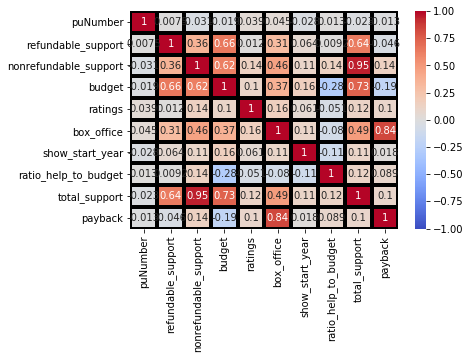

In [123]:
sns.heatmap(
    t.corr(), annot = True, vmin=-1, vmax=1,
    center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',
)

По табличке корреляции можно увидеть, что с поддержкой растет и бюджет ("очевидно же"). А вот на рейтинг сумма поддержки особо не влияет.

Еще можно построить диаграмму рассеяния в зависимости суммы поддержки от рейтинга.

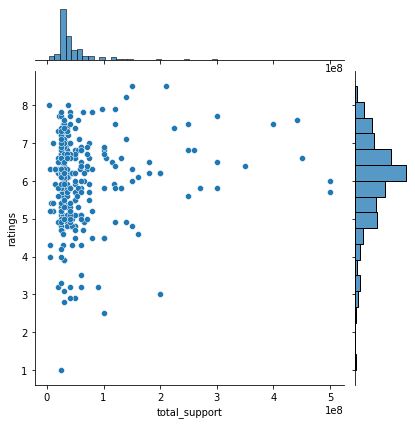

In [124]:
sns.jointplot(data=t, x='total_support', y='ratings', kind='scatter');

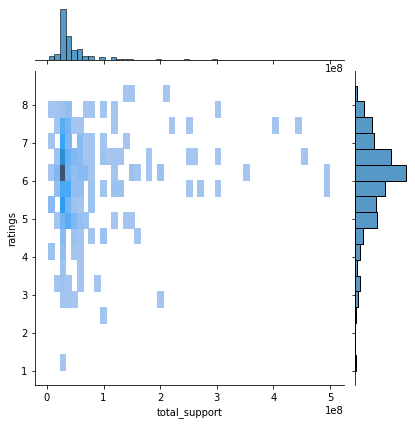

In [125]:
sns.jointplot(data=t, x='total_support', y='ratings', kind='hist');

В выборке преобладают картины с поддержкой до 100 млн рублей. И, в среднем, видим, что хотя бы картины с суммой поддержки больше 200 млн рублей не опускаются в рейтинге ниже 5 баллов (достижение фонда кино). Но и среди самых дорогих фильмов нет тех, которые бы были оценены больше 8 баллов.

Такую же диаграмму можно сделать и в зависимости от окупаемости

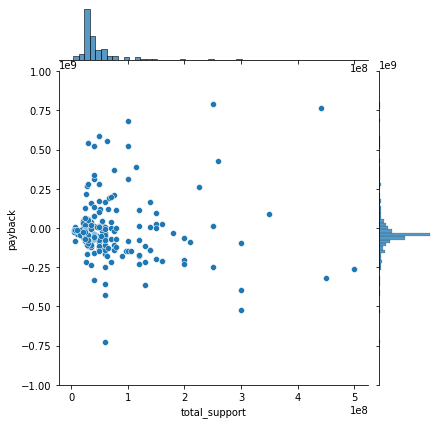

In [126]:
sns.jointplot(data=t, x='total_support', y='payback', kind='scatter');
plt.ylim(-1000000000, 1000000000);

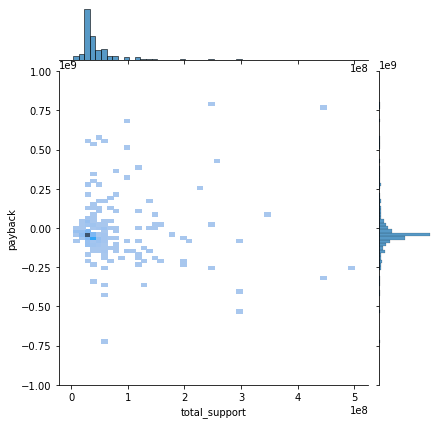

In [127]:
sns.jointplot(data=t, x='total_support', y='payback', kind='hist');
plt.ylim(-1000000000, 1000000000);

По этим графикам видим, что большая часть картин все же не окупается.

Еще можем посмотреть, какие жанры фильмов больше всего поддерживаются, и, какие с самый высокой средней оценкой.

In [128]:
table = t.groupby('genre_first')[['total_support', 'ratings']].agg(['count', 'sum', 'mean','median'])

In [129]:
table.columns = ['_'.join(col).strip() for col in table.columns.values]

Возьмем топ-10 по кол-ву картин

In [130]:
table = table.sort_values(by='total_support_count', ascending=False).head(10)

In [131]:
table

,total_support_count,total_support_sum,total_support_mean,total_support_median,ratings_count,ratings_sum,ratings_mean,ratings_median
genre_first,,,,,,,,
драма,85,5018904333.000,59045933.329,30000000.000,84,536.800,6.390,6.450
комедия,71,3052435000.000,42992042.254,35000000.000,71,391.100,5.508,5.800
мультфильм,30,2391520000.000,79717333.333,65000000.000,30,173.300,5.777,6.150
триллер,15,769645285.000,51309685.667,40000000.000,15,85.600,5.707,5.600
мелодрама,13,350000000.000,26923076.923,28000000.000,13,75.900,5.838,5.900
фэнтези,11,1032900000.000,93900000.000,34000000.000,11,67.000,6.091,6.800
ужасы,10,355000000.000,35500000.000,30000000.000,10,52.000,5.200,5.100
фантастика,10,1381000000.000,138100000.000,85000000.000,9,51.600,5.733,5.700
военный,9,422000866.000,46888985.111,45000000.000,9,58.200,6.467,6.400


В топ-3 по сумме финансирования вошли: драма, комедия, мультфильм. Из этих трех лучшие оценки у драм, средняя оценка - 6.4, что считается по меркам "Кинопоиска" - "на троечку". 

In [132]:
new_table = t.groupby('genre_first')['total_support'].agg(['count', 'mean', 'median']).reset_index(
).sort_values(by='count', ascending=False).head(10)

In [133]:
new_table.sort_values(by='mean', ascending=False)

,genre_first,count,mean,median
18,фантастика,10,138100000.000,85000000.000
12,приключения,7,99428571.429,40000000.000
19,фэнтези,11,93900000.000,34000000.000
10,мультфильм,30,79717333.333,65000000.000
5,драма,85,59045933.329,30000000.000
16,триллер,15,51309685.667,40000000.000
2,военный,9,46888985.111,45000000.000
7,комедия,71,42992042.254,35000000.000
17,ужасы,10,35500000.000,30000000.000
9,мелодрама,13,26923076.923,28000000.000


In [134]:
new_table.sort_values(by='median', ascending=False)

,genre_first,count,mean,median
18,фантастика,10,138100000.000,85000000.000
10,мультфильм,30,79717333.333,65000000.000
2,военный,9,46888985.111,45000000.000
16,триллер,15,51309685.667,40000000.000
12,приключения,7,99428571.429,40000000.000
7,комедия,71,42992042.254,35000000.000
19,фэнтези,11,93900000.000,34000000.000
5,драма,85,59045933.329,30000000.000
17,ужасы,10,35500000.000,30000000.000
9,мелодрама,13,26923076.923,28000000.000


In [135]:
table = t.groupby('director_first')['total_support', 'payback', 'ratings'].agg(['count', 'sum', 'mean','median'])

In [136]:
table.columns = ['_'.join(col).strip() for col in table.columns.values]

In [137]:
table.sort_values(by='total_support_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,total_support_median,payback_count,payback_sum,payback_mean,payback_median,ratings_count,ratings_sum,ratings_mean,ratings_median
director_first,,,,,,,,,,,,
Ф.Бондарчук,2,750000000.000,375000000.000,375000000.000,1,788321489.000,788321489.000,788321489.000,2,11.300,5.650,5.650
Н.Хомерики,3,660000000.000,220000000.000,300000000.000,3,-325561715.770,-108520571.923,-92930337.200,3,18.100,6.033,5.800
А.Кравчук,1,500000000.000,500000000.000,500000000.000,1,-262296814.470,-262296814.470,-262296814.470,1,6.000,6.000,6.000
А.Мизгирев,1,450000000.000,450000000.000,450000000.000,1,-319915396.400,-319915396.400,-319915396.400,1,6.600,6.600,6.600
Н.Лебедев,1,442104482.000,442104482.000,442104482.000,1,766971523.000,766971523.000,766971523.000,1,7.600,7.600,7.600
А.Мегердичев,1,400000000.000,400000000.000,400000000.000,1,2189493953.000,2189493953.000,2189493953.000,1,7.500,7.500,7.500
Р.Давлетьяров,4,352000000.000,88000000.000,86000000.000,4,-315100846.060,-78775211.515,-100033476.030,4,28.600,7.150,7.100
Д.Дьяченко,4,351000000.000,87750000.000,83000000.000,4,1624203322.120,406050830.530,154837534.750,4,22.600,5.650,5.450
И.Шурховецкий,1,350000000.000,350000000.000,350000000.000,1,90392336.000,90392336.000,90392336.000,1,6.400,6.400,6.400


Больше всего поддержки получил Федор Бондарчук. При гос. поддержке он снял две кинокартины. Но данные о выручке есть только по одной. Это фильм "Притяжение". Чистая прибыль составила 788 млн рублей. Хотя рейтинг совсем не высокий - чуть меньше 6 балов. Второй по "вливаниям" гос. поддержки - Николай Хомерики. В целом, его картины сильно убыточны (может, из-за "освоенного" бюджета?), хотя, в среднем, рейтинг будет повыше, чем у фильмов Бондарчука. Но есть в этом списке особый претендент - это Николай Лебедев. Его фильм "Экипаж" и заработал денег, и имеет вполне хорошую оценку (7.6). Попробуем отсортировать теперь по выручке

In [138]:
table.sort_values(by='payback_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,total_support_median,payback_count,payback_sum,payback_mean,payback_median,ratings_count,ratings_sum,ratings_mean,ratings_median
director_first,,,,,,,,,,,,
К.Шипенко,2,285000000.000,142500000.000,142500000.000,2,3172514510.790,1586257255.395,1586257255.395,2,14.200,7.100,7.100
А.Мегердичев,1,400000000.000,400000000.000,400000000.000,1,2189493953.000,2189493953.000,2189493953.000,1,7.500,7.500,7.500
А.Сидоров,1,180000000.000,180000000.000,180000000.000,1,1707969287.520,1707969287.520,1707969287.520,1,6.500,6.500,6.500
Д.Дьяченко,4,351000000.000,87750000.000,83000000.000,4,1624203322.120,406050830.530,154837534.750,4,22.600,5.650,5.450
О.Трофим,1,85000000.000,85000000.000,85000000.000,1,1297146575.890,1297146575.890,1297146575.890,0,0.000,nan,nan
Ф.Бондарчук,2,750000000.000,375000000.000,375000000.000,1,788321489.000,788321489.000,788321489.000,2,11.300,5.650,5.650
Н.Лебедев,1,442104482.000,442104482.000,442104482.000,1,766971523.000,766971523.000,766971523.000,1,7.600,7.600,7.600
Д.Шмидт,3,215000000.000,71666666.667,75000000.000,3,698312261.000,232770753.667,311069235.000,3,18.600,6.200,6.200
Д.Киселев,2,350000000.000,175000000.000,175000000.000,2,696959413.000,348479706.500,348479706.500,2,13.300,6.650,6.650


В таком списке теперь Бондарчук не в лидерах, но далеко не ушел. На первом месте Клим Шипенко. Его картины "Салют-7" и "Холоп" имеют хорошие оценки (7.4 и 6.8) и заработали больше всех. Также в ТОП-10 ворвался Бекмамбетов на последней строчке. У его "Ёлок" так себе оценки, но зато прибыльные (хоть и "последние"). Пора делать выводы.

##### **Вывод**

В мире киноиндустрии не все так однозначно. Фильмы, в среднем, не окупаются, но при этом государственный фонд все равно в прибыли за счет хитов. При этом "хиты" могут иметь "так себе" оценки (средние), но приносить прибыль. Большего всего фильмов при поддержке снято в жанре "драма", на втором месте - "комедия". Самый большая сумма гос. поддержки была выделена Федору Бондарчуку. Он "не подвел" и снял фильм, который был прибылен и даже попал в топ-10 по прибыли. Самый "денежный" режиссер - Клим Шипенко. Его картины были самыми прибыльными. Кстати, у Шипенко еще есть один фильм - "Текст", но в выборку он не попал.

### Шаг 5. Напишите общий вывод

Данные содержать много ошибок, среди них:
* Лишние пробелы в категориальных переменных - исправлено;
* Рейтинги в процентах для некоторых строк - такие значения приведены к NaN;

В датасете есть дубликаты по названию фильма, но у этих кинокартин разные номера прокатных удостоверений, поэтому оставили данные без доп. обработки;
Также есть фильмы с одинаковыми номерами прокатных удостоверений, но, проверив, такие фильмы на официальном - подтвердили, что все так и есть. Видимо, под одним номером может быть в прокате несколько фильмов.
В бюджете фильмов были нулевые значения. В таких строках нулевой бюджет заменили на сумму поддержки.
Для анализа добавили дополнительные столбцы с годом старта показа картины, первого в списке режиссера, и первого в списке жанра, а также отношение суммы поддержки к бюджету.
Больше всего фильмов было показано в кинотеатре в 2019 году, чуть меньше - в 2016.
Минимальная сумма сборов была в 2015, максимальная в 2018.
Наибольшая "средняя" сумма сборов приходится на 2017 год.
Больше всего сборов у фильмов 16+. Если смотреть по годам, то в 2017 году кино 16+ принесло больше всех денег, но в 2015 более "кассовое" кино было 12+.
Больше всего было денег выделено гос. фондом в 2019 году, чуть меньше - в 2016. Но в среднем по медиане самый большой бюджет на каждый фильм приходится на 2018 год. Самые худшие (по рейтингу) фильмы были в прокате в 2016 году. В остальные годы средняя оценка была около 6 баллов. На рейтинг фильма увеличение суммы поддержки особо не влияет. Несмотря на убыточность более 75% фильмов в данной выборке, за счет хитов киноиндустрия окупается. Больше всего фильмов с суммой поддержки до 100 млн рублей, такие фильмы, в основном, с рейтингом чуть больше 6 балов. При этом нет плохих фильмов (с оценкой ниже 5 балов) с суммой поддержки больше 200 млн рублей. По количеству и по сумме поддержки на первом месте жанр "драма", на втором "комедия". Самую большую сумму поддержки получил Федор Бондарчук.
